<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Credit_Card_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [150]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [151]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [152]:
df.shape

(10000, 14)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [154]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [155]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [156]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9223,9224,15623489,Tu,543,France,Female,67,0,128843.67,1,1,1,134612.48,0
883,884,15743007,Seabrook,643,France,Female,45,4,45144.43,1,1,0,60917.24,1
7280,7281,15611973,Tuan,804,France,Male,55,7,0.00,2,1,1,118752.60,0
9709,9710,15682839,Genovesi,575,France,Female,57,8,137936.94,1,1,1,84475.13,0
8591,8592,15611635,Chu,678,Spain,Female,39,6,0.00,1,0,1,185366.56,0


In [157]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [158]:
df.drop(columns=['RowNumber','Surname'], inplace = True)

In [159]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [160]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [161]:
x= df.drop(columns='Exited')
y = df['Exited']

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [163]:
x_train.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,15676909,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,15749265,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,15582492,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,15780386,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,15611759,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [164]:
y_test.head()

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

In [165]:
scaler = StandardScaler()

In [176]:
X_train_scaler = scaler.fit_transform(x_train)
X_test_scaler = scaler.transform(x_test)

In [201]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=12))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='relu'))

In [202]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 11)                143       
                                                                 
 dense_28 (Dense)            (None, 11)                132       
                                                                 
 dense_29 (Dense)            (None, 1)                 12        
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [203]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [204]:
history = model.fit(X_train_scaler,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 6ms/step - loss: 2.1017 - accuracy: 0.7042 - val_loss: 1.9081 - val_accuracy: 0.7331
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 1.8471 - accuracy: 0.7361 - val_loss: 1.7333 - val_accuracy: 0.7506
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 1.6941 - accuracy: 0.7372 - val_loss: 1.6141 - val_accuracy: 0.7500
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 1.5139 - accuracy: 0.7419 - val_loss: 1.3148 - val_accuracy: 0.7550
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 1.1806 - accuracy: 0.7420 - val_loss: 0.9971 - val_accuracy: 0.7600
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.9503 - accuracy: 0.7473 - val_loss: 0.9015 - val_accuracy: 0.7788
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.8785 - accuracy: 0.7694 - val_loss: 0.8055 - val_accuracy: 0.7912

In [205]:
y_log = model.predict(X_test_scaler)

In [206]:
y_log

array([[0.3134347 ],
       [0.4140177 ],
       [0.3113405 ],
       ...,
       [0.07532175],
       [0.16960162],
       [0.05058566]], dtype=float32)

In [207]:
y_pred = np.where(y_log>0.5,1,0)

In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8495

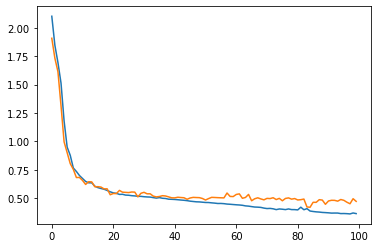

In [209]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

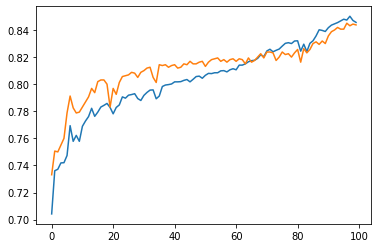

In [210]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])